Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


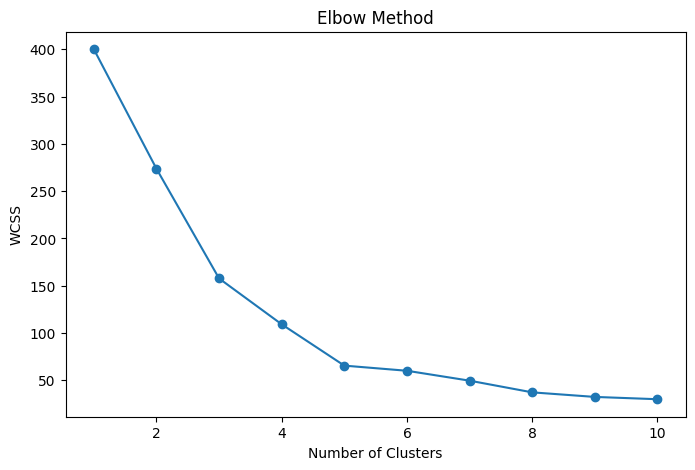

Silhouette Score: 0.555


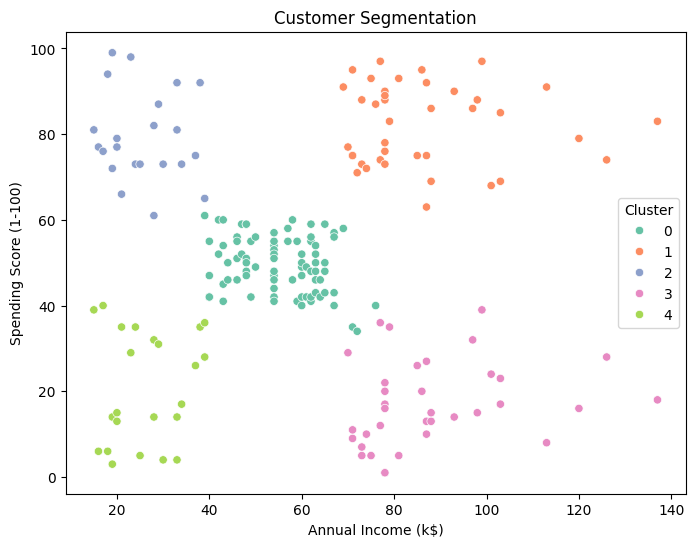

Customer Segmentation Completed Successfully 🚀


In [1]:
# Intelligent Customer Segmentation using K-Means
# Author: Your Name

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# -------------------------------
# 1️⃣ Load Dataset
# -------------------------------
df = pd.read_csv('/kaggle/input/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

print("Dataset Preview:")
print(df.head())

# -------------------------------
# 2️⃣ Select Important Features
# -------------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# -------------------------------
# 3️⃣ Scale the Data
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 4️⃣ Elbow Method
# -------------------------------
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# -------------------------------
# 5️⃣ Apply K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

# -------------------------------
# 6️⃣ Evaluate Model
# -------------------------------
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", round(score, 3))

# -------------------------------
# 7️⃣ Visualize Clusters
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set2'
)

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

print("Customer Segmentation Completed Successfully 🚀")